In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/CV/Lab4/
!ls

from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure as ex
from skimage import restoration, transform, color
from scipy import signal, ndimage
import math

import colorgrad


##Преобразование изображения в разные пространства цвета

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe98e4c2dd8>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7fe98e40eef0>)

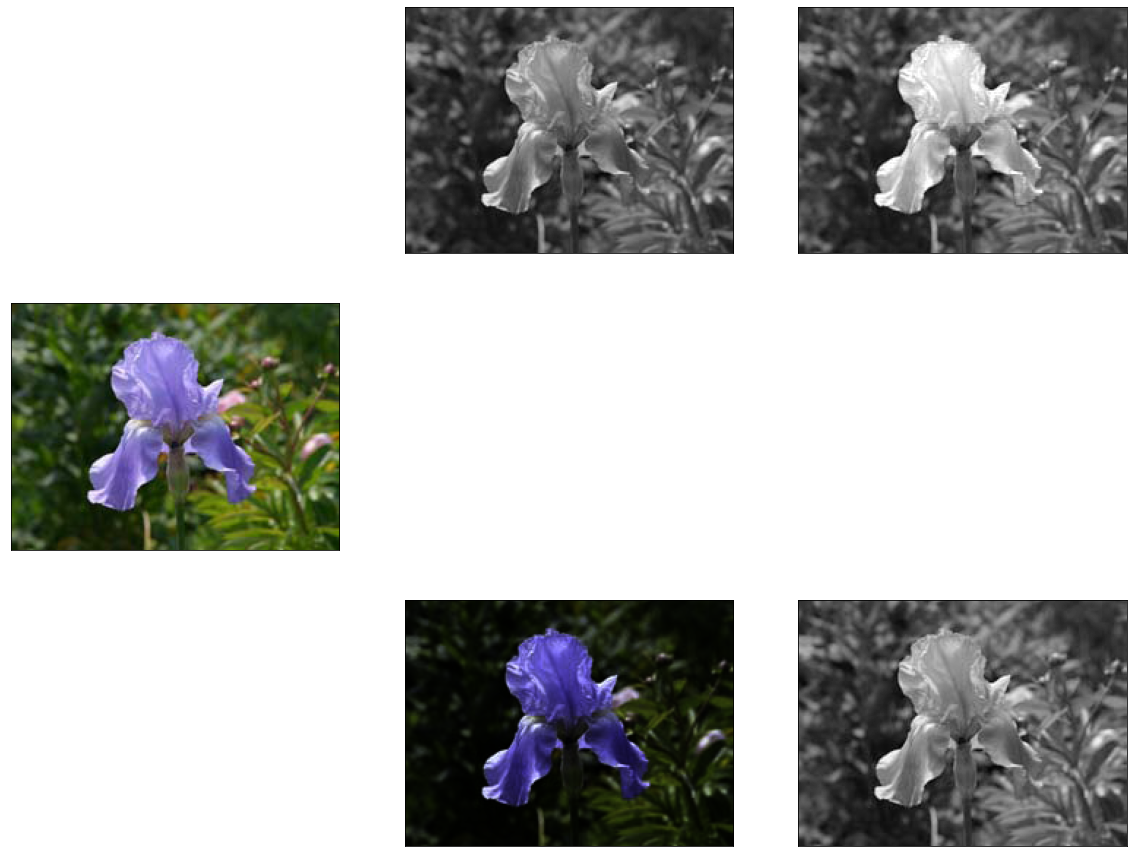

In [ ]:
pic1_orig = cv2.imread('pic1.png')
pic1_orig = cv2.cvtColor(pic1_orig, cv2.COLOR_BGR2RGB)
image1_np=np.array(pic1_orig)

img_gray = color.rgb2gray(image1_np)
img_hsv = color.rgb2hsv(image1_np)
img_xyz = color.rgb2xyz(image1_np)
img_lab = color.rgb2lab(image1_np)

plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(image1_np)
plt.subplot(2,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(img_gray, cmap='gray')
plt.subplot(2,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(img_hsv[:,:,2], cmap='gray')
plt.subplot(2,3,5), plt.xticks([]), plt.yticks([]), plt.imshow(img_xyz)
plt.subplot(2,3,6), plt.xticks([]), plt.yticks([]), plt.imshow(img_lab[:,:,0], cmap='gray')

##Покомпонентное сглаживание изображения

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe98e308550>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7fe98e340940>)

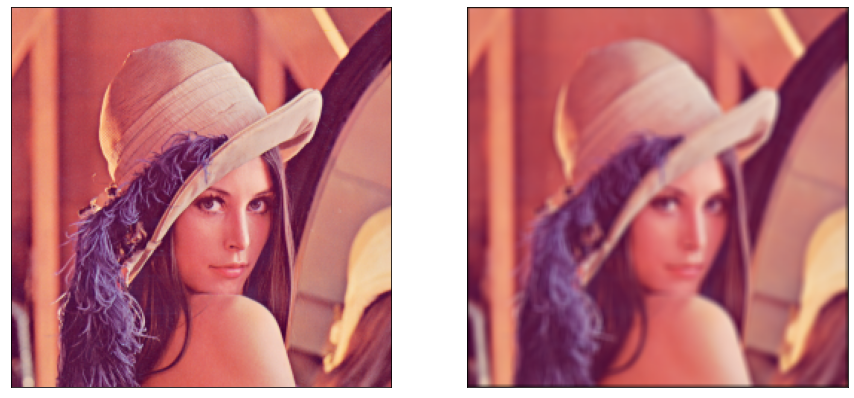

In [ ]:
pic2_orig = cv2.imread('pic2.png', 1)
pic2_orig = cv2.cvtColor(pic2_orig, cv2.COLOR_BGR2RGB)
image2_np=np.array(pic2_orig)

kernel_ones = np.ones((5,5))/25

for i in range(3):
  image2_np[:,:,i] = signal.convolve2d(pic2_orig[:,:,i], kernel_ones, mode='same', boundary='fill', fillvalue=0)

plt.figure(figsize = (15,15))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic2_orig)
plt.subplot(1,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(image2_np)

##HSV и *Lab* сглаживание

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb51f9bdd30>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7fb51f983e48>)

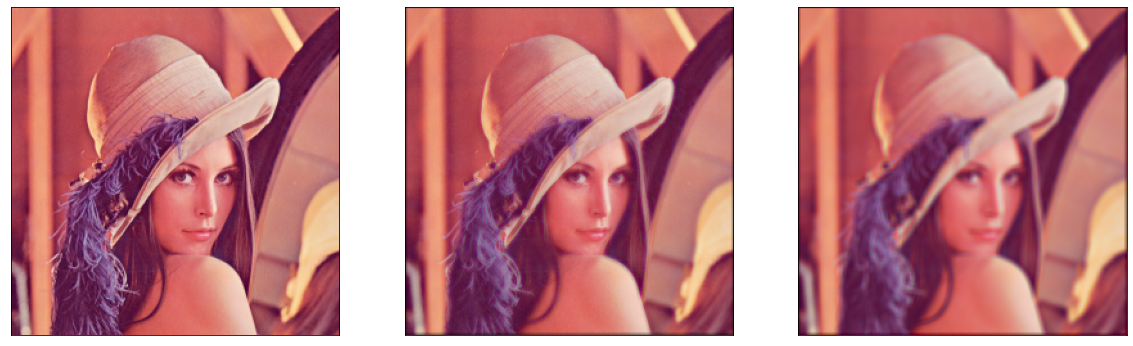

In [ ]:
image2_np=np.array(pic2_orig)

rgb_hsv = color.rgb2hsv(image2_np)
rgb_lab = color.rgb2lab(image2_np)

rgb_hsv[:,:,2] = signal.convolve2d(rgb_hsv[:,:,2], kernel_ones, mode='same', boundary='fill', fillvalue=0)
rgb_lab[:,:,0] = signal.convolve2d(rgb_lab[:,:,0], kernel_ones, mode='same', boundary='fill', fillvalue=0)

hsv_rgb = color.hsv2rgb(rgb_hsv)
lab_rgb = color.lab2rgb(rgb_lab)

plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic2_orig)
plt.subplot(1,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(hsv_rgb)
plt.subplot(1,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(lab_rgb)

##Повышение резкости изображения

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 290 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0x7f1f370b9c18>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f1f37086cf8>)

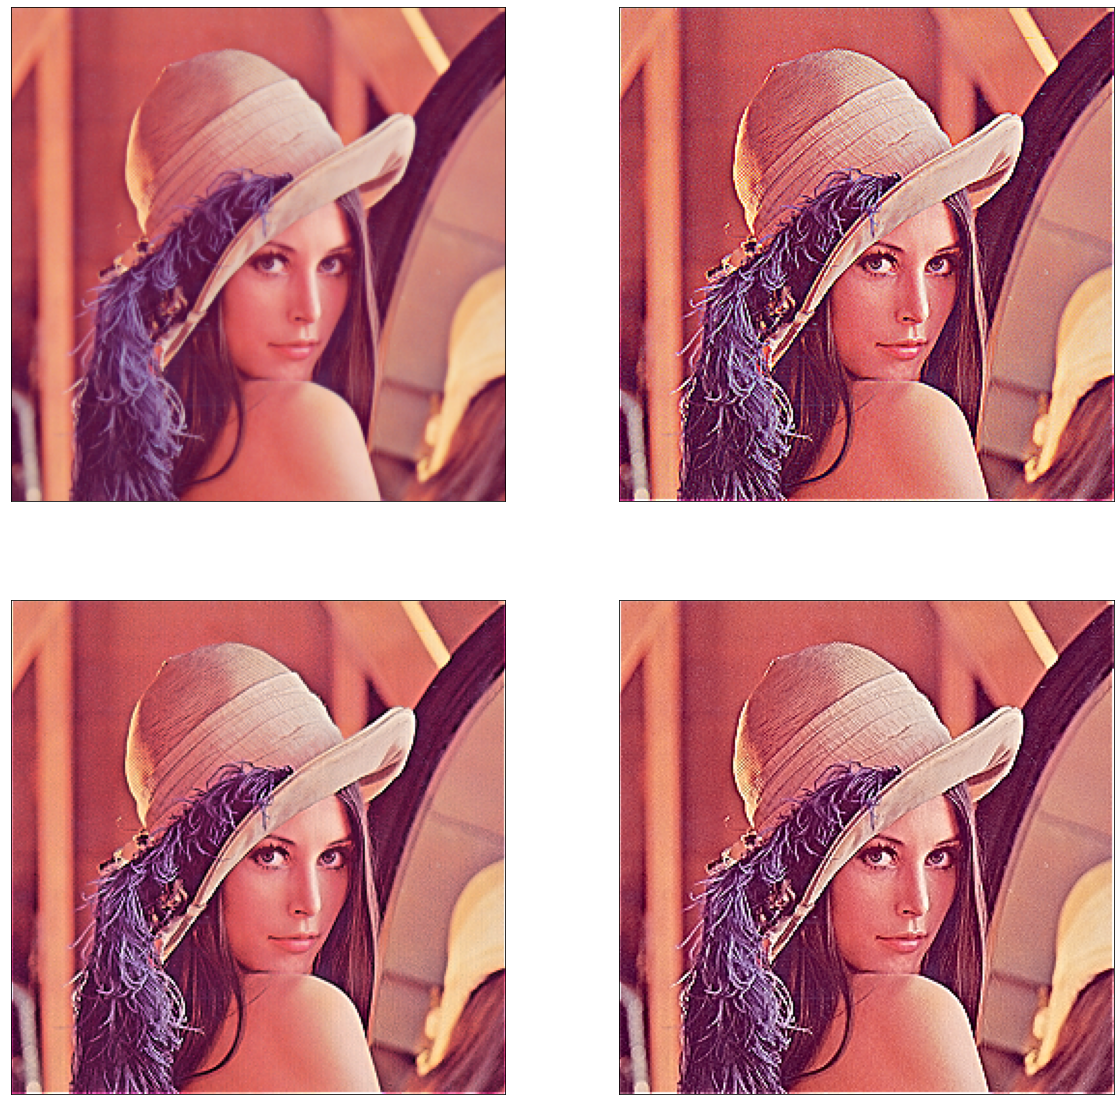

In [ ]:
image2_np=np.array(pic2_orig, dtype="float")

Laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]], dtype="float")

for i in range(3):
  image2_np[:,:,i] = pic2_orig[:,:,i] - signal.convolve2d(pic2_orig[:,:,i].astype('float'), Laplacian, mode='same', boundary='fill', fillvalue=0)
image2_np[image2_np>255] = 255
image2_np[image2_np<0] = 0

rgb_hsv2 = color.rgb2hsv(pic2_orig)
rgb_hsv = rgb_hsv2
rgb_hsv[:,:,2] = rgb_hsv2[:,:,2] - signal.convolve2d(rgb_hsv2[:,:,2], Laplacian, mode='same', boundary='fill', fillvalue=0)
rgb_hsv = color.hsv2rgb(rgb_hsv)

rgb_lab2 = color.rgb2lab(pic2_orig)
rgb_lab = rgb_lab2
rgb_lab[:,:,0] = rgb_lab2[:,:,0] - signal.convolve2d(rgb_lab2[:,:,0], Laplacian, mode='same', boundary='fill', fillvalue=0)
rgb_lab = color.lab2rgb(rgb_lab)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic2_orig)
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(image2_np.astype('uint8'))
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(rgb_hsv)
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(rgb_lab)

##Эквализация гистограмм

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc5596cb7f0>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7fc559684d30>)

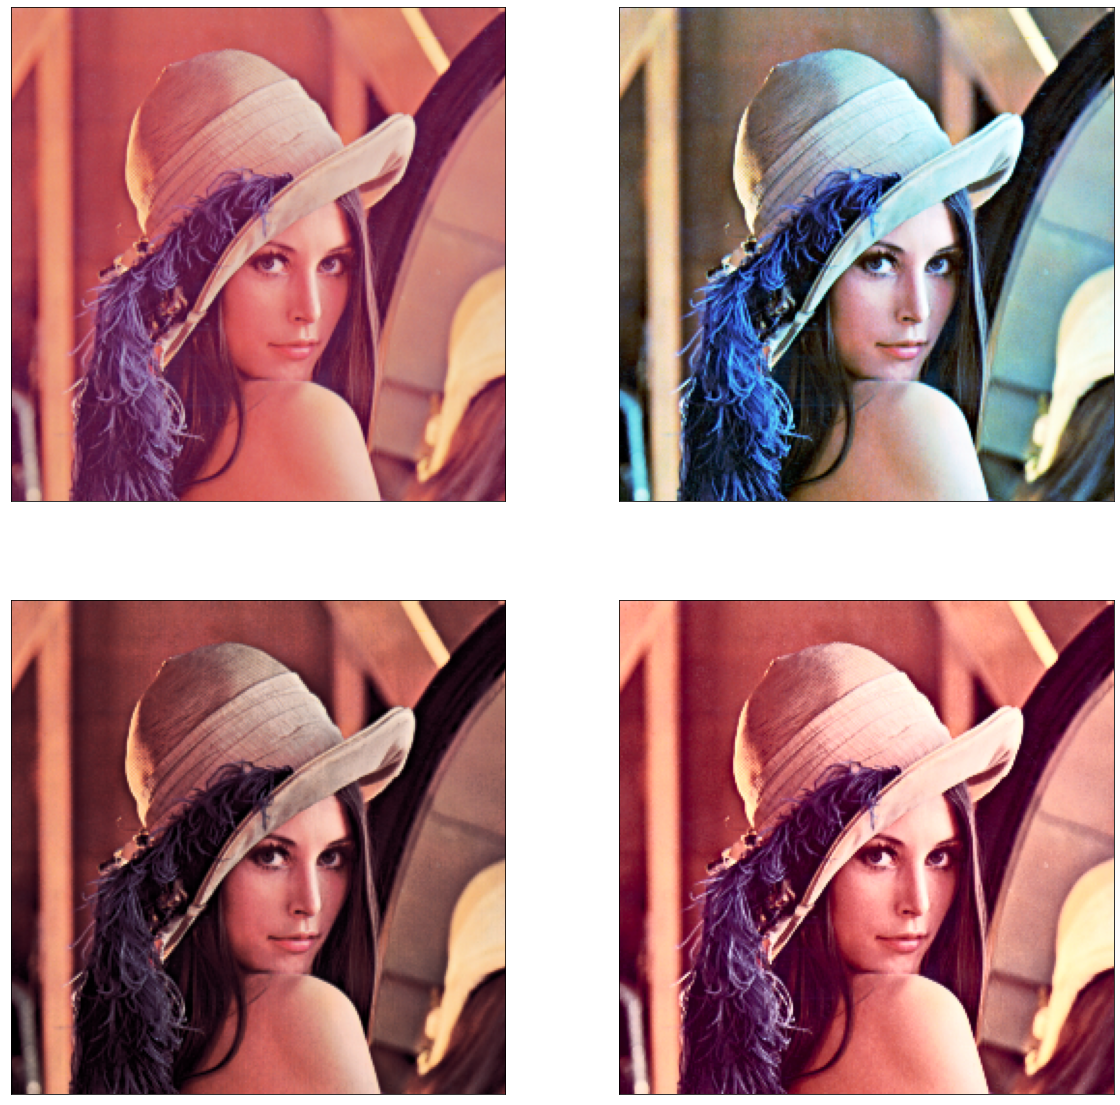

In [ ]:
image3_np=np.array(pic2_orig, dtype='float32')

for i in range(3):
  image3_np[:,:,i] = ex.equalize_hist(pic2_orig[:,:,i].astype('float32'))

rgb_hsv2 = color.rgb2hsv(pic2_orig)
rgb_hsv2[:,:,2] = ex.equalize_hist(rgb_hsv2[:,:,2])
rgb_hsv2 = color.hsv2rgb(rgb_hsv2)
'''
rgb_lab2 = color.rgb2lab(pic2_orig)
rgb_lab2[:,:,0] = ex.equalize_hist(rgb_lab2[:,:,0])
rgb_lab2out = color.lab2rgb(rgb_lab2)
'''
rgb_lab2 = cv2.cvtColor(pic2_orig, cv2.COLOR_RGB2Lab)
rgb_lab2[:,:,0] = cv2.equalizeHist(rgb_lab2[:,:,0])
rgb_lab2 = cv2.cvtColor(rgb_lab2, cv2.COLOR_Lab2RGB)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic2_orig)
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(image3_np)
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(rgb_hsv2)
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(rgb_lab2)


##Выявление контуров

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe98e264e10>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7fe98e22af28>)

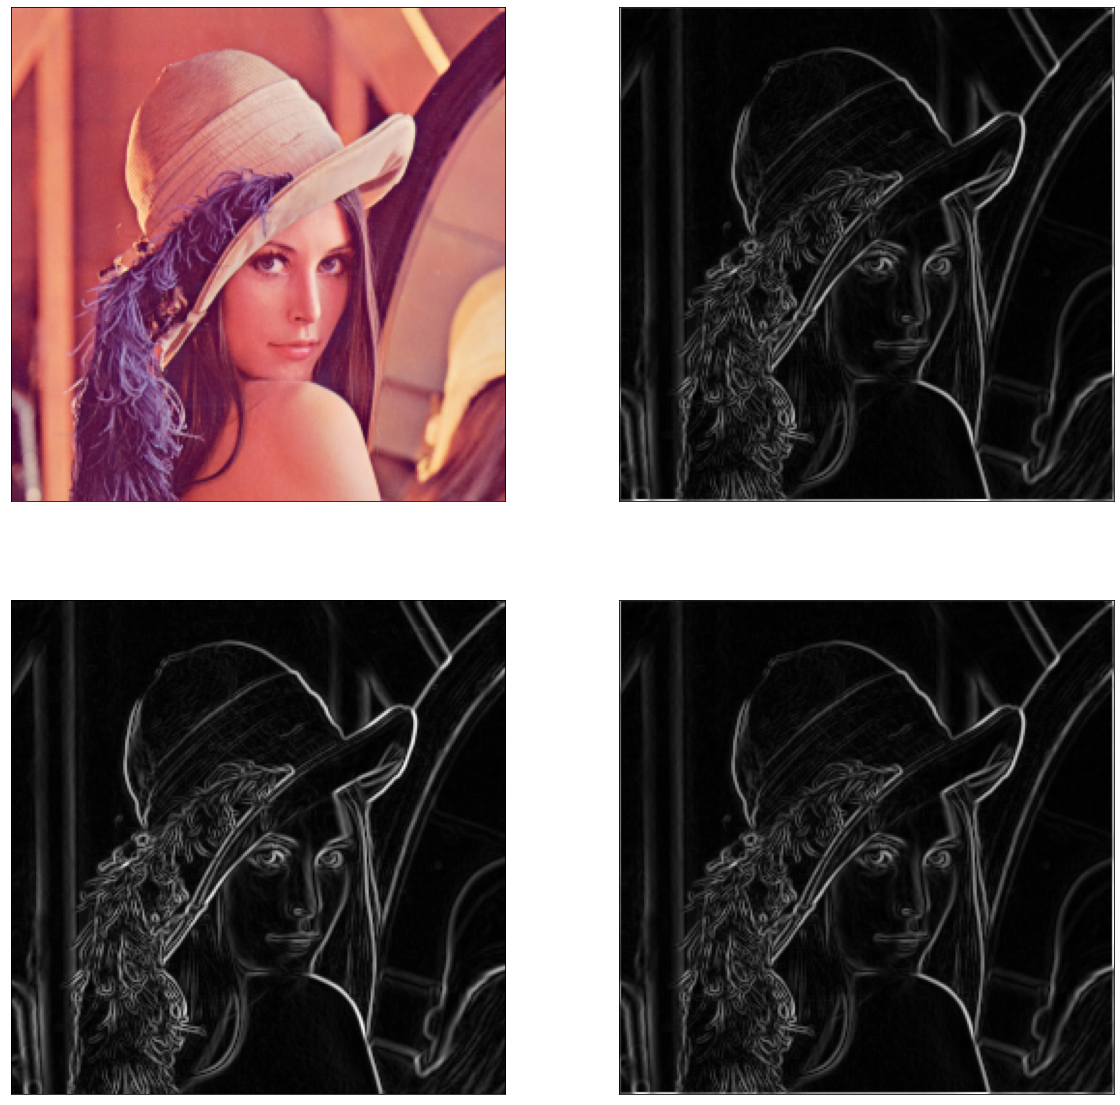

In [ ]:
image4_np=np.array(pic2_orig, dtype='float32')
RGB_x = image4_np
RGB_y = image4_np

h_x = np.array([[-1, 0, 1],
	              [-2, 0, 2],
	              [-1, 0, 1]])
h_y = h_x.T

R_x = signal.convolve2d(pic2_orig[:,:,0].astype('float32'), h_x, mode='same')
R_y = signal.convolve2d(pic2_orig[:,:,0].astype('float32'), h_y, mode='same')

G_x = signal.convolve2d(pic2_orig[:,:,1].astype('float32'), h_x, mode='same')
G_y = signal.convolve2d(pic2_orig[:,:,1].astype('float32'), h_y, mode='same')

B_x = signal.convolve2d(pic2_orig[:,:,2].astype('float32'), h_x, mode='same')
B_y = signal.convolve2d(pic2_orig[:,:,2].astype('float32'), h_y, mode='same')

grad_R = np.sqrt(R_x ** 2 + R_y ** 2)
grad_G = np.sqrt(G_x ** 2 + G_y ** 2)
grad_B = np.sqrt(B_x ** 2 + B_y ** 2)
Component = np.abs(grad_R) + np.abs(grad_G) + np.abs(grad_B)
#Component2 = np.maximum(np.abs(grad_R), np.abs(grad_G), np.abs(grad_B))

VG,_,_ = colorgrad.colorgrad(image4_np)
diff = np.abs(Component-VG)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic2_orig)
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(Component, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(VG, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(diff, cmap='gray')